# Chapter 10 - Classification and Regression with Sequential API

In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
print(keras.__version__)

2.0.0
2.2.4-tf


## Building an Image Classifier Using the Sequential API

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
               'Ankle boot']

class_names[y_train[0]]

'Coat'

In [5]:
model = keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.layers

In [7]:
hidden1 = model.layers[1]
hidden1

In [8]:
hidden1.name

'dense'

In [9]:
model.get_layer('dense') is hidden1

True

In [10]:
weights, bias = hidden1.get_weights()
weights[:10]

array([[-0.00632299, -0.02339573,  0.04051927, ..., -0.04664114,
        -0.00785594, -0.07357346],
       [ 0.05428953, -0.06112337,  0.01149209, ..., -0.06492879,
        -0.04364246, -0.02437637],
       [ 0.02380292, -0.01559437, -0.02578073, ..., -0.06521324,
         0.03878973,  0.03994615],
       ...,
       [ 0.07246546, -0.04125053,  0.00902397, ..., -0.06764467,
         0.05889341, -0.01963213],
       [-0.01117715,  0.06050155,  0.0274039 , ..., -0.01011657,
        -0.02033428, -0.03872079],
       [-0.03969196, -0.05154803,  0.05207835, ...,  0.05814248,
         0.03840483, -0.01235364]], dtype=float32)

In [11]:
bias[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
weights.shape # random to break symmetry

(784, 300)

In [13]:
bias.shape # all zeros

(300,)

In [14]:
# tf.keras.losses.sparse_categorical_crossentropy
# tf.keras.optimizer.SGD()
# tf.keras.metrics.sparse_categorical_accuracy (for this loss)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [16]:
history = model.fit(X_train, y_train,
                    validation_data=[X_valid, y_valid],
                    epochs=30, 
                    verbose=2,
                   # batch_size=32
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 - 11s - loss: 0.7218 - accuracy: 0.7618 - val_loss: 0.5040 - val_accuracy: 0.8324
Epoch 2/30
55000/55000 - 10s - loss: 0.4880 - accuracy: 0.8294 - val_loss: 0.4406 - val_accuracy: 0.8516
Epoch 3/30
55000/55000 - 9s - loss: 0.4432 - accuracy: 0.8447 - val_loss: 0.4523 - val_accuracy: 0.8368
Epoch 4/30
55000/55000 - 10s - loss: 0.4169 - accuracy: 0.8548 - val_loss: 0.3909 - val_accuracy: 0.8668
Epoch 5/30
55000/55000 - 15s - loss: 0.3957 - accuracy: 0.8609 - val_loss: 0.3901 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 - 10s - loss: 0.3801 - accuracy: 0.8672 - val_loss: 0.3745 - val_accuracy: 0.8676
Epoch 7/30
55000/55000 - 10s - loss: 0.3676 - accuracy: 0.8705 - val_loss: 0.3725 - val_accuracy: 0.8644
Epoch 8/30
55000/55000 - 9s - loss: 0.3560 - accuracy: 0.8738 - val_loss: 0.3580 - val_accuracy: 0.8728
Epoch 9/30
55000/55000 - 11s - loss: 0.3447 - accuracy: 0.8778 - val_loss: 0.3520 - val_accuracy: 0.8712
Epoch 10

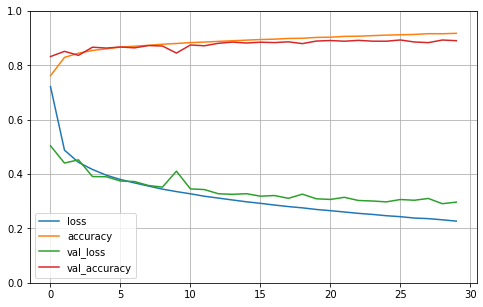

In [17]:
# HDF5 format saves architecture, parameters, optimizer, connection weights, biases
#model.save('my_model.h5')
#model = tf.keras.models.load_model('my_keras_model.h5')

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

- __If retrained, tensorflow will continue from where it stopped above.__

In [18]:
model.evaluate(X_test, y_test, verbose=0)

[0.33389758937358854, 0.8824]

In [19]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [20]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [21]:
import numpy as np

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Building a Regression MLP Using the Sequential API

In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

In [27]:
X_train.shape

(11610, 8)

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train,
                   validation_data=(X_valid, y_valid),
                   epochs=20, verbose=3)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


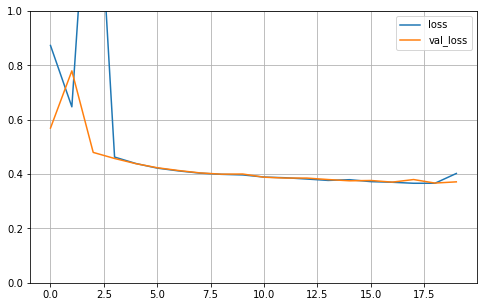

In [35]:
# HDF5 format saves architecture, parameters, optimizer, connection weights, biases
#model.save('my_model.h5')
#model = tf.keras.models.load_model('my_keras_model.h5')

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
mse_test = model.evaluate(X_test, y_test, verbose=0)
X_new = X_test[:3] #"new instances"
y_pred = model.predict(X_new)

In [32]:
mse_test

0.3783527876055518

In [33]:
y_pred

array([[3.8690712],
       [2.21334  ],
       [1.9512801]], dtype=float32)

In [34]:
y_test[:3]

array([5.00001, 1.783  , 1.929  ])